### CaImaging plots

In [1]:
import numpy as np
import pandas as pd
import pygal
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import importlib
import svgutils 
from svgutils.compose import *
#import svgwrite

def svgreload():
    !osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

In [13]:
cd "/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/20190520_nrxn3ahet_ChATgCaMP6s_inx_5dpf/20190520_16_29_33_5dpf_nrxn3ahet_ChATgCaMP6s_L03/"

/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/20190520_nrxn3ahet_ChATgCaMP6s_inx_5dpf/20190520_16_29_33_5dpf_nrxn3ahet_ChATgCaMP6s_L03


In [14]:
# gdf = pd.read_csv("~/Dropbox/K99_BRAIN/zzFigures/Exports/ChATgCaMP_20190125_13_35/13_45_03.csv")

gdf = pd.read_csv("Results.csv")
gdf.head(10)

,,Mean1,Mean2,Mean3,Mean4,Mean5,Mean6,Mean7,Mean8,Mean9,...,Mean32,Mean33,Mean34,Mean35,Mean36,Mean37,Mean38,Mean39,Mean40,Mean41
0,1,32886.734,32898.906,32899.914,33058.855,33011.812,33049.020,33043.500,33130.246,33056.355,...,32871.426,32952.207,33039.367,33163.602,32965.809,32879.250,32969.449,32955.359,32885.066,32777.371
1,2,32891.633,32890.309,32886.887,33072.129,32944.230,33079.512,33018.777,33074.344,33044.941,...,32886.426,33012.457,33035.301,33186.121,32962.383,32886.734,32984.211,32987.695,32895.035,32769.895
2,3,32923.066,32941.332,32887.230,33042.160,32997.625,33077.328,33058.195,33058.945,33045.320,...,32930.148,32938.375,33110.734,33299.641,33011.906,32875.402,32974.113,32916.391,32865.234,32772.066
3,4,32880.000,32898.832,32889.828,33043.207,32987.707,33074.145,33070.891,33071.219,33025.605,...,32903.184,33015.957,33109.434,33424.559,33003.363,32921.375,33016.301,32968.195,32912.965,32773.676
4,5,32917.535,32919.570,32923.570,33022.332,32969.938,33080.164,33021.984,33050.629,33024.020,...,32887.168,33016.582,33120.668,33481.680,33064.746,32935.777,33015.977,33003.750,32877.434,32772.652
5,6,32898.602,32919.953,32890.543,33030.523,32935.438,33074.734,33045.418,33062.910,33016.809,...,32892.203,33013.207,33145.000,33526.359,33054.777,32967.195,33002.438,32972.695,32891.633,32771.566
6,7,32872.500,32894.570,32860.000,33003.906,32976.582,33072.430,33045.930,33029.172,32994.121,...,32894.852,33051.082,33139.766,33548.762,33074.316,32949.945,32998.938,32998.668,32876.832,32772.406
7,8,32896.566,32894.855,32869.145,32995.254,32953.145,33054.961,33016.777,33032.871,32993.871,...,32916.465,33015.543,33149.266,33477.801,33038.207,32942.516,32989.938,32958.973,32893.133,32773.352
8,9,32885.766,32890.215,32855.027,33014.094,32955.395,33103.879,33052.348,33030.809,33017.742,...,32890.168,33018.832,33144.199,33438.039,33038.684,32926.805,32989.699,32992.445,32931.965,32772.410
9,10,32899.301,32910.285,32880.371,33102.191,33024.750,33086.406,33027.391,33062.344,33014.156,...,32883.723,33026.750,33058.633,33425.078,33067.316,32900.141,33013.387,32981.918,32858.668,32771.531


In [16]:
# dff.iloc[:,0]
# for c in dff:
#     print(dff[c])

In [17]:
limits=[50,100]
dt = 12.207;
t = np.divide(range(0,len(gdf)),dt)
background = np.average(gdf.iloc[:,gdf.shape[1]-1].values[limits[0]:limits[1]])


dff = gdf.copy(deep=True);
# subtract background
dff = dff - background;
# restore background in background column
dff.iloc[:,dff.shape[1]-1] = dff.iloc[:,dff.shape[1]-1] + background
# calculate df/f
for c in dff:
    dff[c] = np.divide(dff[c],np.average(dff[c][limits[0]:limits[1]]))-1
#normalize background column to get stimulus artifact
dff.iloc[:,dff.shape[1]-1] = dff.iloc[:,dff.shape[1]-1] / np.max(dff.iloc[:,dff.shape[1]-1]) * dff.values.max()
dff.head(10)

,,Mean1,Mean2,Mean3,Mean4,Mean5,Mean6,Mean7,Mean8,Mean9,...,Mean32,Mean33,Mean34,Mean35,Mean36,Mean37,Mean38,Mean39,Mean40,Mean41
0,0.002278,0.139580,0.219866,0.168593,0.170590,0.966965,-0.045256,0.022644,0.058020,-0.127078,...,-0.045758,-0.245261,-0.309081,-0.372281,-0.274130,-0.135138,-0.115950,-0.208665,-0.724611,0.396010
1,0.002248,0.188497,0.136831,0.049014,0.224874,0.411244,0.060065,-0.070688,-0.107358,-0.162192,...,0.099089,0.007930,-0.319612,-0.336128,-0.287001,-0.074444,-0.049652,-0.068647,-0.700198,-0.225421
2,0.002217,0.502361,0.629640,0.052162,0.102318,0.850307,0.052522,0.078118,-0.152913,-0.161026,...,0.521289,-0.303387,-0.124238,-0.153878,-0.100941,-0.166345,-0.095004,-0.377401,-0.773175,-0.044960
3,0.002187,0.072340,0.219151,0.076010,0.106599,0.768752,0.041527,0.126047,-0.116602,-0.221677,...,0.260912,0.022638,-0.127605,0.046670,-0.133037,0.206490,0.094470,-0.153084,-0.656292,0.088869
4,0.002156,0.447133,0.419450,0.385739,0.021232,0.622639,0.062317,-0.058581,-0.177515,-0.226553,...,0.106254,0.025264,-0.098508,0.138375,0.097582,0.323288,0.093014,0.000873,-0.743300,0.003751
5,0.002126,0.258084,0.423149,0.082573,0.054729,0.338948,0.043562,0.029884,-0.141183,-0.248737,...,0.154874,0.011082,-0.035487,0.210104,0.060128,0.578084,0.032209,-0.133599,-0.708529,-0.086522
6,0.002095,-0.002549,0.177987,-0.197791,-0.054119,0.677272,0.035604,0.031817,-0.240992,-0.318534,...,0.180454,0.170245,-0.049044,0.246071,0.133537,0.438189,0.016489,-0.021133,-0.744774,-0.016698
7,0.002064,0.237754,0.180739,-0.113846,-0.089501,0.484551,-0.024735,-0.078238,-0.230049,-0.319303,...,0.389159,0.020898,-0.024438,0.132147,-0.002127,0.377941,-0.023931,-0.193016,-0.704856,0.061937
8,0.002034,0.129914,0.135924,-0.243439,-0.012456,0.503053,0.144230,0.056045,-0.236149,-0.245867,...,0.135224,0.034720,-0.037562,0.068312,-0.000335,0.250527,-0.025004,-0.048079,-0.609764,-0.016365
9,0.002003,0.265064,0.329771,-0.010799,0.347810,1.073353,0.083878,-0.038169,-0.142858,-0.256899,...,0.072988,0.067994,-0.259181,0.047504,0.107237,0.034285,0.081382,-0.093662,-0.789254,-0.089431


In [21]:
def formatSubPlot(axH,pltH):
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    axH.spines['bottom'].set_visible(False)
    axH.spines['left'].set_visible(False)
    pltH.ylim(-1, 2.5)
    pltH.xlim(0, 120)
    pltH.xticks([])
    pltH.yticks([])

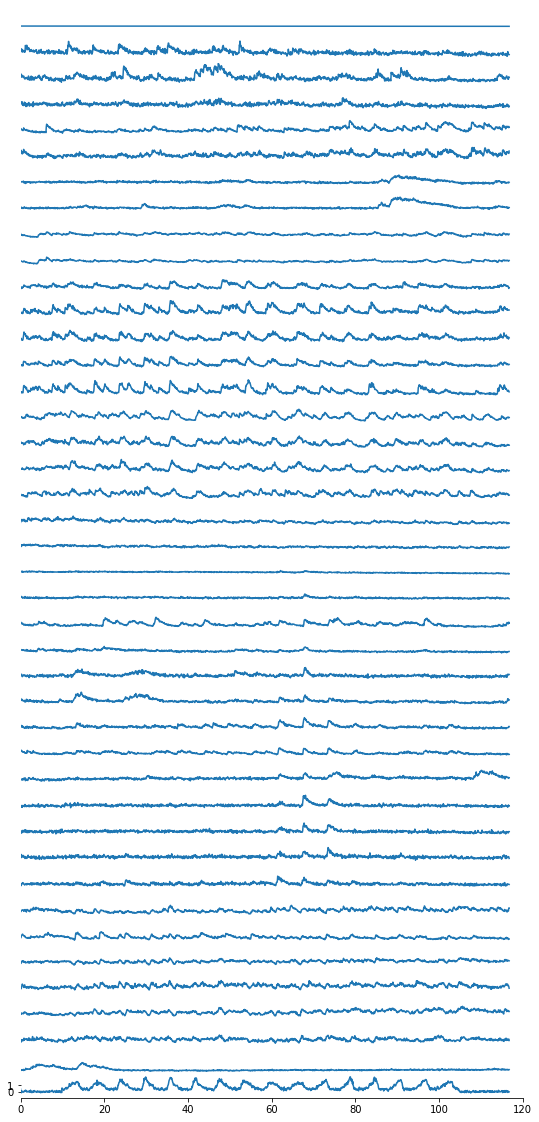

In [26]:
nPlots = dff.shape[1];
figH, ax = plt.subplots(nPlots, 1, figsize=(9, 20))
# figH.subplots_adjust(hspace = .5, wspace=.001)


for i in range(nPlots-1):
    ax[i] = plt.subplot(nPlots,1,1+i)
    plt.plot(t,dff.iloc[:,i])
    formatSubPlot(ax[i],plt);

ax[nPlots-1] = plt.subplot(nPlots,1,nPlots)
plt.plot(t,dff.iloc[:,nPlots-1])
ax[nPlots-1].spines['top'].set_visible(False)
ax[nPlots-1].spines['right'].set_visible(False)
ax[nPlots-1].spines['bottom'].set_visible(True)
ax[nPlots-1].spines['left'].set_visible(False)
plt.yticks([0,1]);
plt.ylim(-1, 2.5);
plt.xlim(0, 120);
# plt.xticks([0,10]);

plt.savefig("{0}.pdf".format("dff"), transparent=True, format="pdf")

# fig, ax = plt.subplots(17,1, figsize=(9, 17), facecolor='w', edgecolor='k')

# ax = ax.ravel()
# for i in range(10):
#     ax[i].plot(t,dff.iloc[:,i])
#     formatSubPlot(ax,plt);

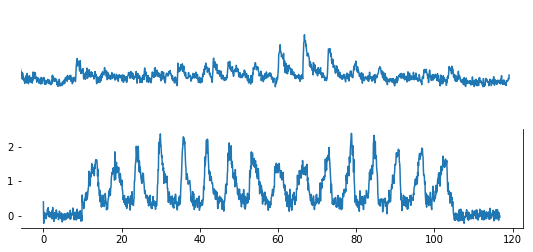

In [28]:
i=27;

figH, ax = plt.subplots(2, 1, figsize=(9, 4))
ax[0] = plt.subplot(2,1,1)
plt.plot(t,dff.iloc[:,i])
formatSubPlot(ax[0],plt);

ax[1] = plt.subplot(2,1,2)
plt.plot(t,dff.iloc[:,nPlots-1])
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].spines['left'].set_visible(False)






plt.savefig("{0}.pdf".format("dff_example"), transparent=True, format="pdf")


In [ ]:
gdf.columns

#### Manual way

In [ ]:

roi1 = gdf.Mean1.values - background
roi2 = gdf.Mean2.values  - background
roi3 = gdf.Mean3.values - background
roi4 = gdf.Mean4.values - background
roi5 = gdf.Mean5.values - background
roi6 = gdf.Mean6.values  - background

# calculate df/f
limits=[50,100]
roi1 = np.divide(roi1,np.average(roi1[limits[0]:limits[1]]))-1
roi2 = np.divide(roi2,np.average(roi2[limits[0]:limits[1]]))-1
roi3 = np.divide(roi3,np.average(roi3[limits[0]:limits[1]]))-1
roi4 = np.divide(roi4,np.average(roi4[limits[0]:limits[1]]))-1
roi5 = np.divide(roi5,np.average(roi5[limits[0]:limits[1]]))-1
roi6 = np.divide(roi6,np.average(roi6[limits[0]:limits[1]]))-1